# Imports

In [1]:
# Ajouter chemin système pour naviguer d'un dossier à l'autre facilement
import sys
from pathlib import Path
sys.path.append(str(Path('.').absolute().parent))

In [2]:
########## Installations ##########

#pip install plot-keras-history

In [3]:
########## Imports ##########
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import time

from packages import fonctions

%matplotlib inline
import os
from os import listdir
from glob import glob

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn import manifold, decomposition
from sklearn import cluster, metrics
#from tensorflow.keras.optimizers.legacy import Adam

#pip install plot-keras-history
from plot_keras_history import show_history, plot_history

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# tensorflow
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

os.environ['TF_KERAS'] = '1'
print('Num GPUs Available: ', len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [4]:
# Warnings
import warnings
warnings.simplefilter(action = 'ignore')

# Set display preferences
pd.set_option('display.max_row', 250)
pd.set_option('display.max_column', 100)

In [5]:
# Choix d'une palette de couleurs

sns.set_palette('Set2', color_codes = True)
print(sns.color_palette('Set2').as_hex())
# palettes testées : 'Spectral', 'flare', 'twilight', 'husl', 'Set1', 'Set2', 'Set3'
#sns.set_style('darkgrid')
sns.color_palette()

['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']


[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

# Préparation des données

In [6]:
# Modifier import pour prendre csv issu de la data exploration (données nettoyées et préparées)

In [7]:
########## Import données csv ##########
# dossier data hors du dossier code pour ne pas l'importer dans github

df = pd.read_csv('../../data/flipkart_com-ecommerce_sample_1050.csv')
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [8]:
# Dictionnaire des catégories (pour réduire le nombre de catégories - cf notebook Data_exploration_EDA)
dict_categories = {
    'Home and Kitchen Essential' : [
        'Home Furnishing', 'Tray Sets', 'Coffee Mugs', 'Lunch Boxes', 'Caffeine Bowls', 'Water bottle', 'Omic Sippers', 'Kitchen Tools', 'Bar Accessories', 'Bar Glasses', 'Idli Makers', 'Craft Jugs', 'Table Clocks', 'Bhalaria Forks', 'Kitchen Containers'],
    'Baby and Personal Care' : [
        'Baby Care', 'Personal Care'],
    'Electronics and Accessories' : [
        'Wrist Watches', 'Network Components', 'Tablet Accessories', 'Laptop Accessories', 'Pen Drives', 'Computer Components'],
    'Festive and Special Occasion' : ['Festive Needs', 'BFT Bulbs']
}

In [9]:
# Extraire catégories de la feature 'product_category_tree' et réduire nombre de catégories en utilisant le dictionnaire ci dessus
df['category'] = df.apply(fonctions.get_category, axis = 1)
inverse = { v: k for k, l in dict_categories.items() for v in l }
df['category_4'] = df['category'].map(inverse)
df['category_4'].value_counts()

category_4
Baby and Personal Care          300
Electronics and Accessories     292
Home and Kitchen Essential      263
Festive and Special Occasion    151
Name: count, dtype: int64

In [ ]:
# Barplot

product_categories = df['category_4'].value_counts()

plt.figure()
sns.barplot(x = product_categories.index, y = product_categories.values)
plt.title('Payment type')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# Camembert
plt.figure()
plt.plot.pie(data = df, y = 'category_4')
plt.show()

In [ ]:
df['category_4'].unique()

In [10]:
df = df[['category_4', 'description']]
df.columns = ['category', 'description']
df.shape

(1050, 2)

In [11]:
df['category'].unique().tolist()

['Home and Kitchen Essential',
 'Baby and Personal Care',
 'Electronics and Accessories',
 'Festive and Special Occasion',
 nan]

In [12]:
# Chemin des images

#path_train = '../../data/Images/train/'
#path_test = '../../data/Images/test/'

path = '../../data/Images/'

data_path = glob(path + '**.jp*')
#data_path_test = glob(path_test + '**.jp*')

In [13]:
data = fonctions.data_fct(df, data_path)
#data_test = fonctions.data_fct(df, data_path_test)

1050


In [14]:
# Encoding des labels

le = preprocessing.LabelEncoder()
le.fit(data['label_name'])
data['label'] = le.transform(data['label_name'])
#data_test['label'] = le.transform(data_test['label_name'])
data.head(5)

,image_path,label_name,label
0,../../data/Images/aa68675f50a0551b8dadb954017a...,Home and Kitchen Essential,3
1,../../data/Images/037c2402fee39fbc80433935711d...,Baby and Personal Care,0
2,../../data/Images/42643c1c9403f67921a18654bcf4...,Baby and Personal Care,0
3,../../data/Images/53f4bc7d7321f5c41de6b86e41f1...,Home and Kitchen Essential,3
4,../../data/Images/b144a363c107c7bdd91f32d6e28b...,Home and Kitchen Essential,3


In [15]:
# Nombre d'images par catégorie
data.groupby('label').count()

,image_path,label_name
label,,
0,300,300
1,292,292
2,151,151
3,263,263
4,44,0


In [17]:
########## Gestion des données manquantes ##########
# quelques images non catégorisées -> données manquantes
# Isolation des données manquantes dans un df à part pour traitement ultérieur
df_nan = data.loc[data['label_name'].isna()]
df_nan

,image_path,label_name,label
52,../../data/Images/8f41c6931b5220c2bb34d1cab21c...,NaN,4
86,../../data/Images/170fdf050c7a1f8d30ef5a98c421...,NaN,4
87,../../data/Images/f9a8320c182841024f47ebcba284...,NaN,4
115,../../data/Images/cf2ba696547459733c6bbfad4e3b...,NaN,4
234,../../data/Images/52877a6306aef18af67ab54c8233...,NaN,4
238,../../data/Images/f01140c02fd09e5c56312a64fa8d...,NaN,4
240,../../data/Images/de911421573d3e234450040374b5...,NaN,4
241,../../data/Images/ae03731c3482a5e42d040dbf723c...,NaN,4
242,../../data/Images/63523a600ab69f276664d0eade9d...,NaN,4
243,../../data/Images/32cf0691248297655e2c1728b12e...,NaN,4


In [18]:
df_nan.reset_index(drop = True, inplace = True)

In [19]:
df_nan.shape

(44, 3)

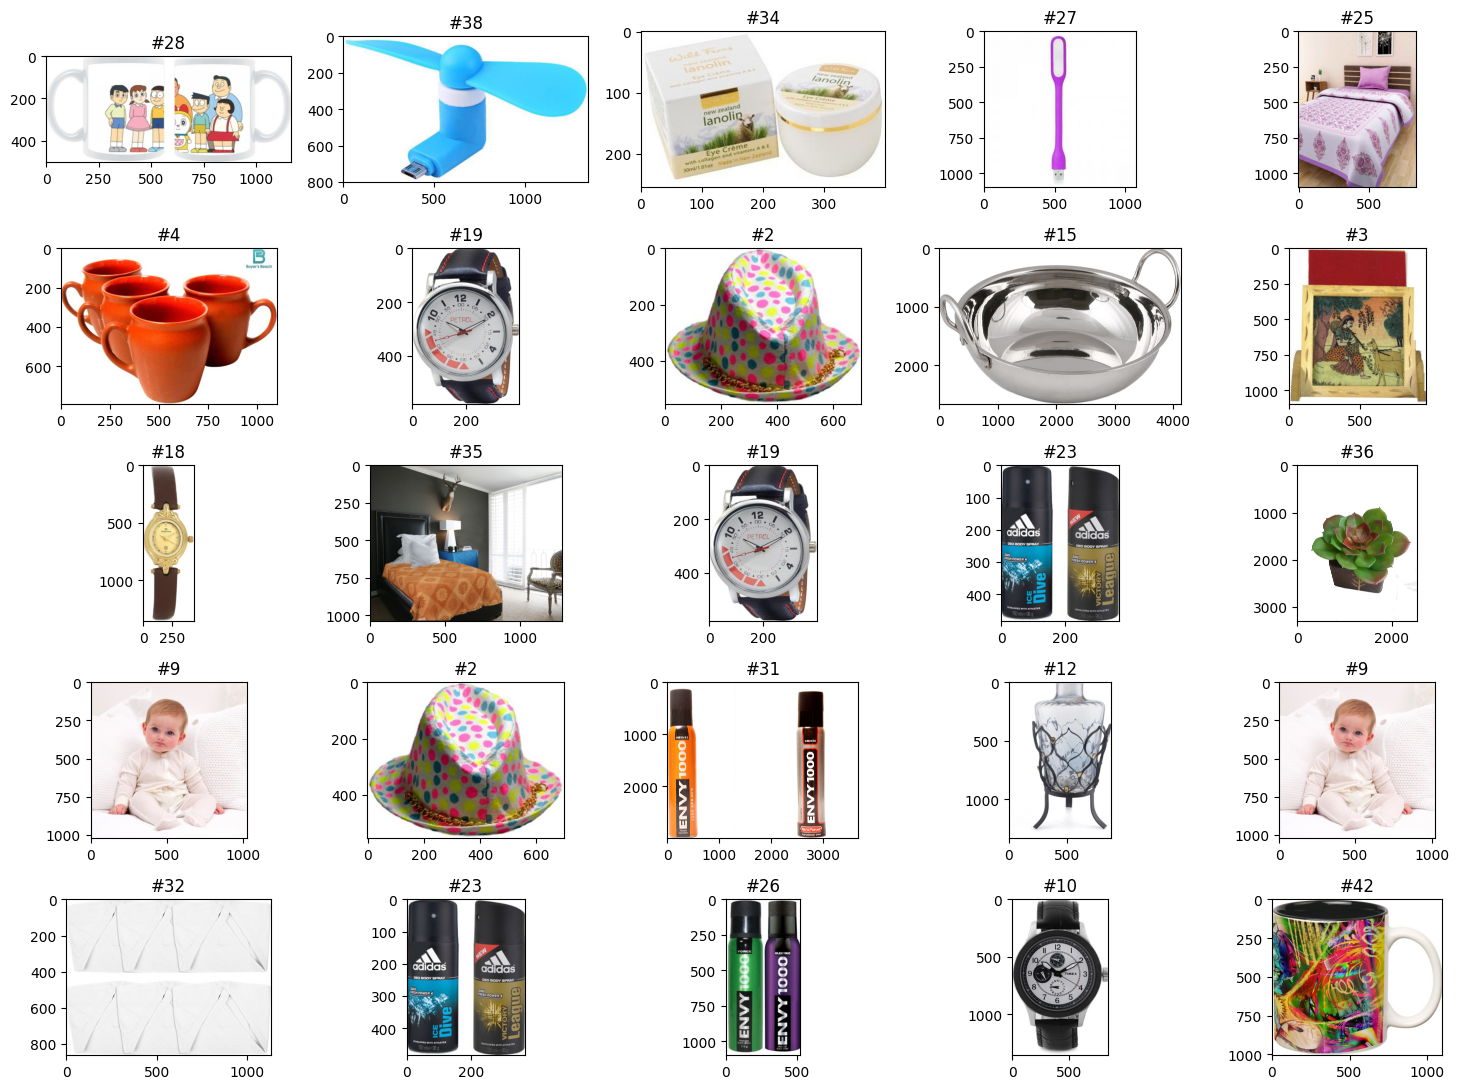

In [20]:
# Visualiser quelques images non catégorisées :

# plot 25 images au hasard
plt.figure(figsize = (15, 11))

for i in range(0, 25):
    plt.subplot(5, 5, 1 + i)
    x = int(np.random.randint(0, 44, 1))
    image = imread(df_nan['image_path'][x])
    plt.title(f'#{x}')
    plt.imshow(image)

plt.tight_layout()
plt.show()

In [21]:
# deux solutions :
# - 1) labelliser manuellement les images
# - 2) les exclures de l'analyse et le reprendre à la fin pour tester algo de classification

# choix de la 2ème option et drop nan ici
data.dropna(inplace = True)

In [22]:
# Vérifier que les données ont bien été supprimées
data.loc[data['label_name'].isna()]

,image_path,label_name,label


In [23]:
# Re-initialisation de l'index après suppression des données manquantes
data.reset_index(drop = True, inplace = True)

Home and Kitchen Essential


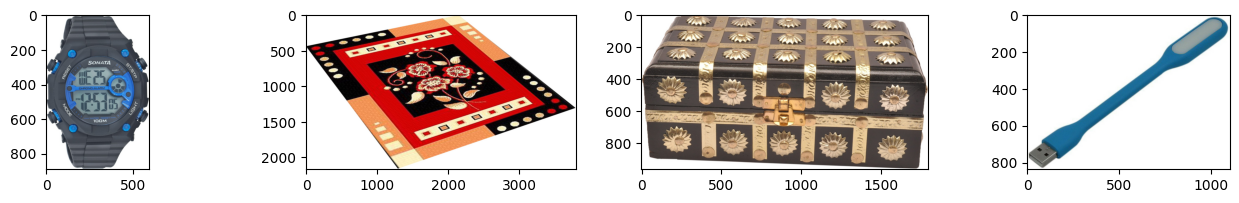

Baby and Personal Care


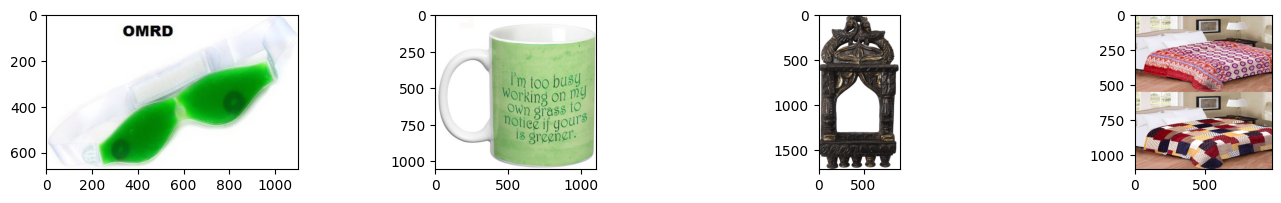

Electronics and Accessories


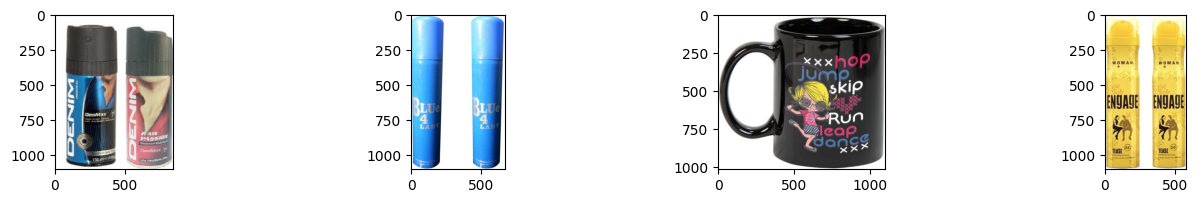

Festive and Special Occasion


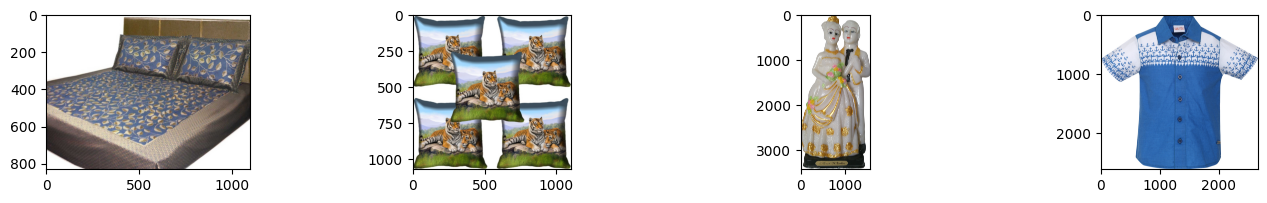

In [24]:
# Visualisation des images de chaque catégorie
list_labels = data['label_name'].unique().tolist()

for name in list_labels:
    print(name)
    plt.figure(figsize = (17, 2))
    for i in range(len(list_labels)):
        plt.subplot(140 + 1 + i)
        filename = fonctions.list_fct(data, name)[i + 10]
        image = imread(filename)
        plt.imshow(image)
    plt.show()

In [25]:
# Note -> mug mal catégorisé, parrure de lit aussi...
# Remise en cause de la classification par défaut des produits

# Proposer une catégorisation alternative ?

# Etape 1 : étude de faisabilité

In [26]:
## Création du modèle pré-entraîné

# Modèle VGG16
# pourquoi ? on fait quoi ici ?? expliquer un peu

base_model = VGG16()
model = Model(inputs = base_model.inputs, outputs = base_model.layers[-2].output)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [27]:
## Création des features des images

images_features = []
i = 0 
for image_file in data['image_path']:
    if i % 100 == 0:
        print(i)
    i +=1
    image = load_img(image_file, target_size = (224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis = 0)
    image = preprocess_input(image)
    images_features.append(model.predict(image, verbose = 0)[0]) # predict from pretrained model

images_features = np.asarray(images_features)
images_features.shape

0
100
200
300
400
500
600
700
800
900
1000


(1006, 4096)

## Réduction dimension et analyse

In [28]:
### Réduction de dimension PCA

print(images_features.shape)
pca = decomposition.PCA(n_components = 0.99)
feat_pca = pca.fit_transform(images_features)
print(feat_pca.shape)

(1006, 4096)
(1006, 776)


In [29]:
### Réduction de dimension T-SNE et affichage des images selon vraies classes

temps1 = time.time()

tsne = manifold.TSNE(n_components = 2, perplexity = 30, n_iter = 2000, init = 'random', random_state = 6)
X_tsne = tsne.fit_transform(feat_pca)

duration1=time.time() - temps1
print('temps de T-SNE : ', '%15.2f' % duration1, 'secondes')

temps de T-SNE :             4.32 secondes


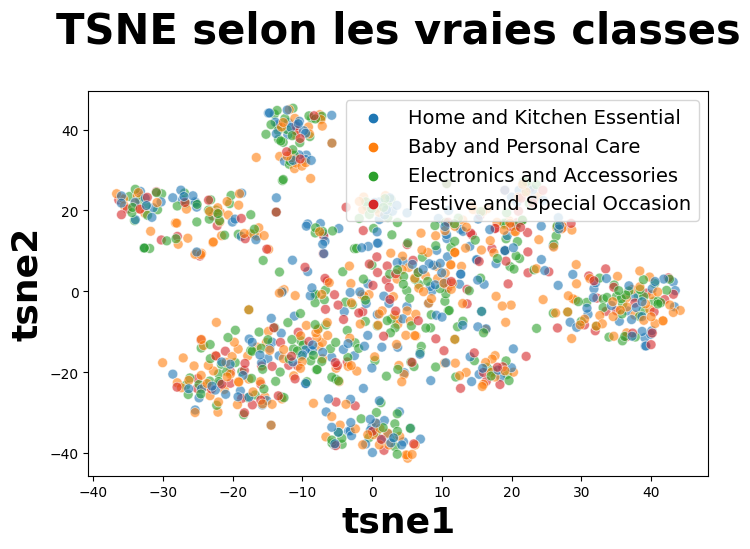

In [30]:
df_tsne = pd.DataFrame(X_tsne, columns = ['tsne1', 'tsne2'])
df_tsne['class'] = data['label_name']

plt.figure(figsize = (8, 5))
sns.scatterplot(
    x = 'tsne1',
    y = 'tsne2',
    hue = 'class',
    palette = sns.color_palette('tab10', n_colors = 4),
    s = 50,
    alpha = 0.6,
    data = df_tsne,
    legend = 'brief'
    )

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop = {'size': 14})
plt.show()

In [31]:
# A MODIFIER en mettant légende sur le côté

In [32]:
### Création de clusters à partir du T-SNE et affichage des images selon clusters

cls = cluster.KMeans(n_clusters = 4, n_init = 100)
cls.fit(X_tsne)

KMeans(n_clusters=4, n_init=100)

In [33]:
df_tsne['cluster'] = cls.labels_
df_tsne

,tsne1,tsne2,class,cluster
0,8.581536,0.138421,Home and Kitchen Essential,2
1,-8.427393,-27.690182,Baby and Personal Care,1
2,-15.183122,-12.656017,Baby and Personal Care,1
3,15.330283,-20.523001,Home and Kitchen Essential,3
4,39.084579,-11.447703,Home and Kitchen Essential,3
...,...,...,...,...
1001,-20.803825,-21.144775,Baby and Personal Care,1
1002,0.996933,-5.575341,Baby and Personal Care,1
1003,19.140907,-7.668469,Baby and Personal Care,3
1004,-6.388327,-10.914069,Baby and Personal Care,1


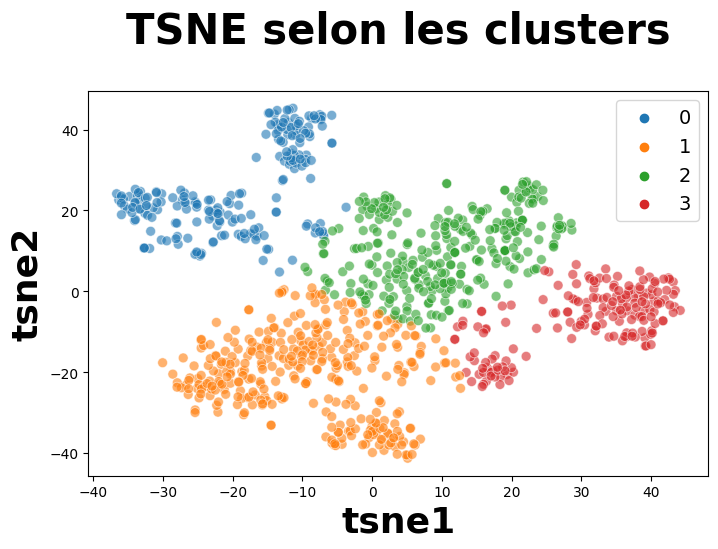

In [34]:
# Visualisation du TSNE selon les clusters définis

plt.figure(figsize = (8, 5))
sns.scatterplot(
    x = 'tsne1',
    y = 'tsne2',
    hue = 'cluster',
    palette = sns.color_palette('tab10', n_colors = 4),
    s = 50,
    alpha = 0.6,
    data = df_tsne,
    legend = 'brief'
    )

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop = {'size': 14}) 
plt.show()

In [35]:
# Calcul de l'ARI score

labels = data['label']
print('ARI : ', metrics.adjusted_rand_score(labels, cls.labels_))

ARI :  -0.0013583627788902439


In [36]:
# Commenter l'ari score

In [37]:
# Analyse d'image "shine" affectées au cluster 3 "cloudy"
# hein ?????

list_shine_0 = [i for i in range(len(data['image_path'])) \
                if (data.iloc[i]['label_name'] == 'Baby and Personal Care') and (df_tsne.iloc[i]['cluster'] == 3)]
list_shine_0[0]

42

tsne1                         40.158787
tsne2                        -10.309981
class      Festive and Special Occasion
cluster                               3
Name: 220, dtype: object


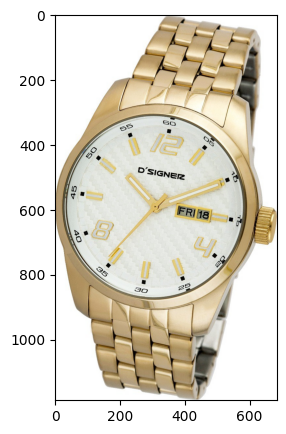

In [38]:
# Affichage image "shine" considérée comme "cloudy"
id = 220 ### A VERIFIER
print(df_tsne.iloc[id])
fig = plt.figure(figsize = (8, 5))
# plt.subplot(130 + 1 + i)
filename = data['image_path'][id]
image = imread(filename)
plt.imshow(image)
plt.show()

### Analyse par classes

In [39]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[ 62 105  78  55]
 [ 65 102  77  48]
 [ 25  48  50  28]
 [ 52  85  81  45]]


In [40]:
cls_labels_transform = fonctions.conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)

Correspondance des clusters :  [1 0 3 0]
[[160  62   0  78]
 [150  65   0  77]
 [ 76  25   0  50]
 [130  52   0  81]]


In [41]:
print(metrics.classification_report(labels, cls_labels_transform))

              precision    recall  f1-score   support

           0       0.31      0.53      0.39       300
           1       0.32      0.22      0.26       292
           2       0.00      0.00      0.00       151
           3       0.28      0.31      0.30       263

    accuracy                           0.30      1006
   macro avg       0.23      0.27      0.24      1006
weighted avg       0.26      0.30      0.27      1006



In [42]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels], columns = [i for i in '0123'])
df_cm

,0,1,2,3
Home and Kitchen Essential,160,62,0,78
Baby and Personal Care,150,65,0,77
Electronics and Accessories,76,25,0,50
Festive and Special Occasion,130,52,0,81


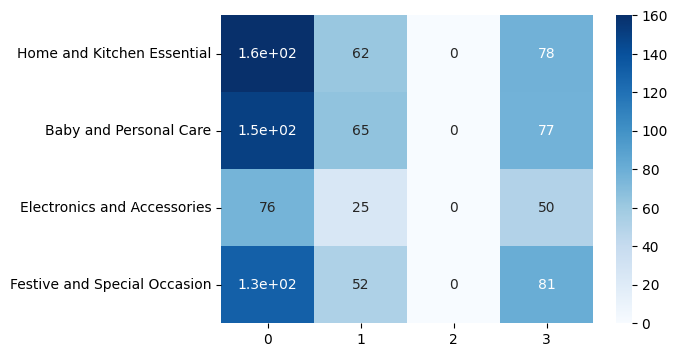

In [43]:
# modifier format annotations
plt.figure(figsize = (6, 4))
sns.heatmap(df_cm, annot = True, cmap = 'Blues')
plt.show()

# Etape 2 : classification supervisée
4 approches sont présentées :
* Une approche simple par préparation initiale de l'ensemble des images avant classification supervisée
* Une approche par data generator, permettant facilement la data augmentation. Les images sont directement récupérées à la volée dans le repertoire des images
* Une approche récente proposée par Tensorflow.org par DataSet, sans data augmentation
* Une approche par  DataSet, avec data augmentation intégrée au modèle : layer en début de modèle


## Création du modèle de classification

In [44]:
# cf fichier fonctions.py

## Approche préparation initiale des images

In [45]:
# Séparer "data" en deux morceaux pour avoir data train et data test
data.shape

(1006, 3)

In [46]:
data

,image_path,label_name,label
0,../../data/Images/aa68675f50a0551b8dadb954017a...,Home and Kitchen Essential,3
1,../../data/Images/037c2402fee39fbc80433935711d...,Baby and Personal Care,0
2,../../data/Images/42643c1c9403f67921a18654bcf4...,Baby and Personal Care,0
3,../../data/Images/53f4bc7d7321f5c41de6b86e41f1...,Home and Kitchen Essential,3
4,../../data/Images/b144a363c107c7bdd91f32d6e28b...,Home and Kitchen Essential,3
...,...,...,...
1001,../../data/Images/4e5ebfc871992e7e22365c0c036a...,Baby and Personal Care,0
1002,../../data/Images/82fbc93cd45ab747e7e606f2c52c...,Baby and Personal Care,0
1003,../../data/Images/216c6c3527984be3d7ad9023d5cd...,Baby and Personal Care,0
1004,../../data/Images/f54d0c5cbd8e2270742293edf907...,Baby and Personal Care,0


In [47]:
# Séparation des données en train et en test
# XXXXX images
# on en prend environ 30% pour le jeu de données test
# 700 / 300 (donner les chiffres exacts)

In [48]:
data_train = data[:700]
data_train

,image_path,label_name,label
0,../../data/Images/aa68675f50a0551b8dadb954017a...,Home and Kitchen Essential,3
1,../../data/Images/037c2402fee39fbc80433935711d...,Baby and Personal Care,0
2,../../data/Images/42643c1c9403f67921a18654bcf4...,Baby and Personal Care,0
3,../../data/Images/53f4bc7d7321f5c41de6b86e41f1...,Home and Kitchen Essential,3
4,../../data/Images/b144a363c107c7bdd91f32d6e28b...,Home and Kitchen Essential,3
...,...,...,...
695,../../data/Images/534d9c3ae2342df2f4f9233622f9...,Festive and Special Occasion,2
696,../../data/Images/08613e8b27838b997069b1fedb6e...,Electronics and Accessories,1
697,../../data/Images/a63eecfbb02004863fa1f29a0b81...,Electronics and Accessories,1
698,../../data/Images/6ed34e1ab886e8a702ec59dd66ba...,Home and Kitchen Essential,3


In [49]:
data_test = data[700:]
data_test.reset_index(drop = True, inplace = True)

In [50]:
# dire ce qu'on fait ici
images_np = fonctions.image_prep_fct(data_train)
images_np

array([[[[ 95.061    ,  79.221    ,  68.32     ],
         [ 93.061    ,  76.221    ,  68.32     ],
         [ 95.061    ,  77.221    ,  71.32     ],
         ...,
         [ 71.061    ,  62.221    ,  56.32     ],
         [ 69.061    ,  60.221    ,  54.32     ],
         [ 66.061    ,  57.221    ,  51.32     ]],

        [[ 93.061    ,  77.221    ,  66.32     ],
         [ 93.061    ,  76.221    ,  68.32     ],
         [ 96.061    ,  78.221    ,  72.32     ],
         ...,
         [ 68.061    ,  59.221    ,  53.32     ],
         [ 68.061    ,  59.221    ,  53.32     ],
         [ 69.061    ,  60.221    ,  54.32     ]],

        [[ 94.061    ,  77.221    ,  69.32     ],
         [ 94.061    ,  77.221    ,  69.32     ],
         [ 95.061    ,  77.221    ,  71.32     ],
         ...,
         [ 70.061    ,  61.221    ,  55.32     ],
         [ 67.061    ,  58.221    ,  52.32     ],
         [ 64.061    ,  55.221    ,  49.32     ]],

        ...,

        [[ 84.061    ,  70.221    ,  6

In [51]:
images_np.shape

(700, 224, 224, 3)

In [52]:
images_np_test = fonctions.image_prep_fct(data_test)
images_np_test

array([[[[ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ],
         ...,
         [ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ]],

        [[ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ],
         ...,
         [ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ]],

        [[ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ],
         ...,
         [ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ]],

        ...,

        [[ 151.061   ,  138.22101 ,  1

In [53]:
images_np_test.shape

(306, 224, 224, 3)

In [54]:
X = images_np
X

array([[[[ 95.061    ,  79.221    ,  68.32     ],
         [ 93.061    ,  76.221    ,  68.32     ],
         [ 95.061    ,  77.221    ,  71.32     ],
         ...,
         [ 71.061    ,  62.221    ,  56.32     ],
         [ 69.061    ,  60.221    ,  54.32     ],
         [ 66.061    ,  57.221    ,  51.32     ]],

        [[ 93.061    ,  77.221    ,  66.32     ],
         [ 93.061    ,  76.221    ,  68.32     ],
         [ 96.061    ,  78.221    ,  72.32     ],
         ...,
         [ 68.061    ,  59.221    ,  53.32     ],
         [ 68.061    ,  59.221    ,  53.32     ],
         [ 69.061    ,  60.221    ,  54.32     ]],

        [[ 94.061    ,  77.221    ,  69.32     ],
         [ 94.061    ,  77.221    ,  69.32     ],
         [ 95.061    ,  77.221    ,  71.32     ],
         ...,
         [ 70.061    ,  61.221    ,  55.32     ],
         [ 67.061    ,  58.221    ,  52.32     ],
         [ 64.061    ,  55.221    ,  49.32     ]],

        ...,

        [[ 84.061    ,  70.221    ,  6

In [55]:
y = to_categorical(data['label'][:700])
y

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [56]:
X_test = images_np_test
X_test

array([[[[ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ],
         ...,
         [ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ]],

        [[ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ],
         ...,
         [ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ]],

        [[ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ],
         ...,
         [ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ]],

        ...,

        [[ 151.061   ,  138.22101 ,  1

In [57]:
data_test['label'].unique()

array([3, 0, 1, 2])

In [58]:
y_test = to_categorical(data_test['label'])
y_test

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [59]:
y_test.shape

(306, 4)

In [60]:
# Train test split (split en train et en validation) -> du coup on a un jeu de données train, un jeu de données validation et un jeu de données test
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify = y, test_size = 0.25, random_state = 42)
X_train.shape

(525, 224, 224, 3)

In [61]:
X_test.shape

(306, 224, 224, 3)

In [62]:
y_train.shape

(525, 4)

In [63]:
# Création du modèle
with tf.device('/gpu:0'):
    model1 = fonctions.create_model_fct()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [64]:
# Création du callback
model1_save_path1 = './model1_best_weights.h5'
checkpoint = ModelCheckpoint(model1_save_path1, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'min')
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
callbacks_list = [checkpoint, es]

In [65]:
# pourquoi 50 epoch
# pourquoi batch size de 64

In [66]:
# Entraîner sur les données d'entraînement (X_train, y_train)
with tf.device('/gpu:0'):
    history1 = model1.fit(X_train, y_train, epochs = 50, batch_size = 64, callbacks = callbacks_list, validation_data = (X_val, y_val), verbose = 1)

Epoch 1/50
9/9 [==============================] - ETA: 0s - loss: 8.1168 - accuracy: 0.2705
Epoch 1: val_loss improved from inf to 4.38526, saving model to ./model1_best_weights.h5
9/9 [==============================] - 76s 9s/step - loss: 8.1168 - accuracy: 0.2705 - val_loss: 4.3853 - val_accuracy: 0.1714
Epoch 2/50
9/9 [==============================] - ETA: 0s - loss: 5.3824 - accuracy: 0.3086
Epoch 2: val_loss improved from 4.38526 to 3.84757, saving model to ./model1_best_weights.h5
9/9 [==============================] - 79s 9s/step - loss: 5.3824 - accuracy: 0.3086 - val_loss: 3.8476 - val_accuracy: 0.2571
Epoch 3/50
9/9 [==============================] - ETA: 0s - loss: 3.6993 - accuracy: 0.3733
Epoch 3: val_loss improved from 3.84757 to 3.15484, saving model to ./model1_best_weights.h5
9/9 [==============================] - 91s 10s/step - loss: 3.6993 - accuracy: 0.3733 - val_loss: 3.1548 - val_accuracy: 0.2514
Epoch 4/50
9/9 [==============================] - ETA: 0s - loss: 2

In [67]:
# choix de l'accuracy -> dire pourquoi

In [68]:
# Score du dernier epoch
loss, accuracy = model1.evaluate(X_train, y_train, verbose = True)
print('Training Accuracy: {:.4f}'.format(accuracy))

loss, accuracy = model1.evaluate(X_val, y_val, verbose = True)
print('Validation Accuracy: {:.4f}'.format(accuracy))

17/17 [==============================] - 91s 5s/step - loss: 0.2097 - accuracy: 0.9733
Training Accuracy: 0.9733
6/6 [==============================] - 30s 5s/step - loss: 2.4256 - accuracy: 0.2743
Validation Accuracy: 0.2743


In [69]:
# Score de l'epoch optimal
model1.load_weights(model1_save_path1)

loss, accuracy = model1.evaluate(X_val, y_val, verbose = False)
print('Validation Accuracy : {:.4f}'.format(accuracy))

loss, accuracy = model1.evaluate(X_test, y_test, verbose = False)
print('Test Accuracy : {:.4f}'.format(accuracy))

Validation Accuracy : 0.2514
Test Accuracy : 0.2810


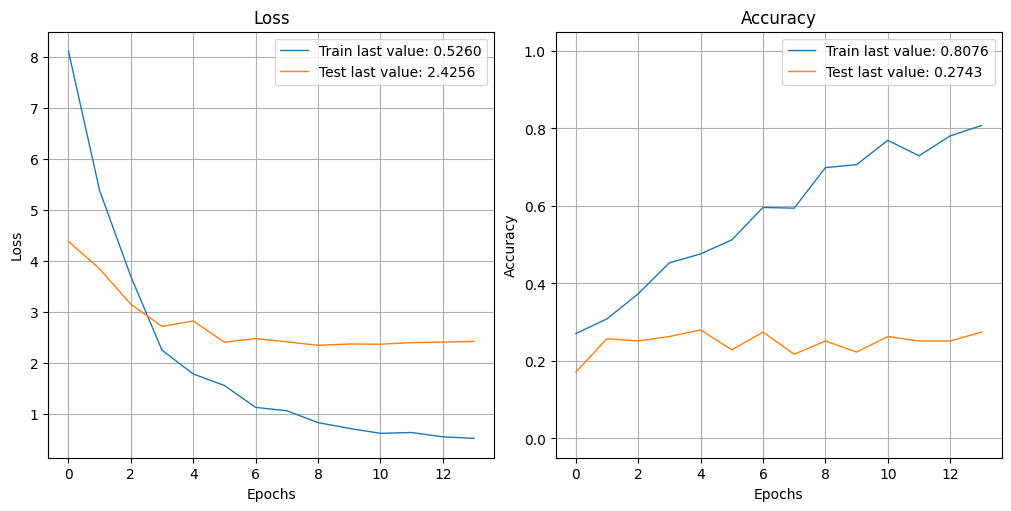

In [70]:
# plot blablabla

show_history(history1)
plot_history(history1, path = 'standard.png')
plt.close()

In [71]:
y_val_num = np.argmax(y_val, axis = 1)
print(y_val_num)

[0 1 3 0 2 1 0 2 0 2 1 1 0 3 1 1 0 0 2 1 3 1 1 3 2 1 0 0 0 0 0 0 1 1 0 1 1
 1 3 2 1 0 0 1 0 0 1 0 3 3 3 3 1 1 1 1 0 1 2 1 0 3 3 0 3 2 0 1 1 2 3 3 3 1
 3 2 3 0 1 2 0 1 1 3 2 2 3 3 1 3 0 3 0 0 1 3 3 2 2 0 3 0 2 0 3 0 0 1 3 3 0
 1 3 1 2 0 1 3 1 0 3 1 2 3 1 2 1 0 0 1 1 3 0 1 1 2 0 2 1 2 2 2 0 1 0 0 0 1
 1 1 3 0 0 1 2 3 0 0 2 1 1 1 1 3 3 3 0 3 2 3 0 3 2 1 0]


In [72]:
y_val_pred = np.argmax(model1.predict(X_val), axis = 1)
print(y_val_pred)

6/6 [==============================] - 30s 5s/step
[1 3 1 1 2 0 3 1 1 1 0 3 0 1 3 3 1 0 0 0 1 0 1 2 3 3 1 3 3 1 3 1 3 1 0 3 1
 2 0 1 1 0 2 0 0 3 0 0 0 0 0 3 3 1 0 0 1 1 3 3 2 1 2 0 1 1 1 0 3 0 3 0 2 1
 1 1 3 1 0 1 3 0 0 0 1 3 0 2 1 1 0 3 3 3 1 1 1 0 2 1 3 0 3 1 0 1 1 1 2 3 0
 0 1 1 1 0 1 1 3 1 0 3 3 1 1 3 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 3 2 0 0 1 1 0
 1 0 1 3 1 0 0 1 0 0 1 2 2 0 0 0 3 2 1 3 1 3 1 2 3 0 1]


In [73]:
# Matrice de confusion

conf_mat = metrics.confusion_matrix(y_val_num, y_val_pred)
print(conf_mat)

[[16 23  3  9]
 [23 17  3 12]
 [ 5 13  2  8]
 [10 15  7  9]]


In [74]:
y_val_pred_transform = fonctions.conf_mat_transform(y_val_num, y_val_pred)
conf_mat = metrics.confusion_matrix(y_val_num, y_val_pred_transform)
print(conf_mat)

Correspondance des clusters :  [1 0 3 1]
[[23 25  0  3]
 [17 35  0  3]
 [13 13  0  2]
 [15 19  0  7]]


In [75]:
# Rapport de classification :

print(metrics.classification_report(y_val_num, y_val_pred_transform))

              precision    recall  f1-score   support

           0       0.34      0.45      0.39        51
           1       0.38      0.64      0.48        55
           2       0.00      0.00      0.00        28
           3       0.47      0.17      0.25        41

    accuracy                           0.37       175
   macro avg       0.30      0.31      0.28       175
weighted avg       0.33      0.37      0.32       175



In [76]:
# Mise sous forme de dataframe de la matrice de confusion ?
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels], columns = [i for i in '0123'])
df_cm

,0,1,2,3
Home and Kitchen Essential,23,25,0,3
Baby and Personal Care,17,35,0,3
Electronics and Accessories,13,13,0,2
Festive and Special Occasion,15,19,0,7


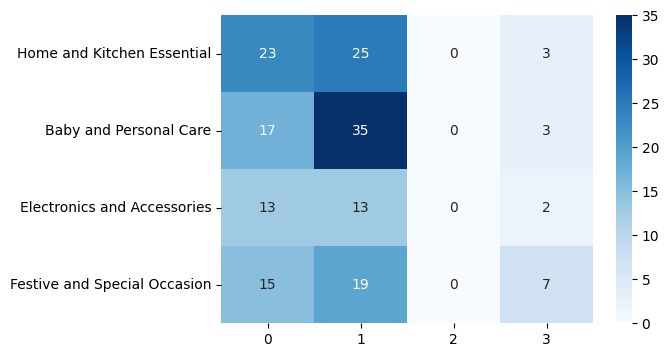

In [77]:
# Heatmap blabla

plt.figure(figsize = (6, 4))
sns.heatmap(df_cm, annot = True, cmap = 'Blues')
plt.show()

## Approche ImageDatagenerator avec data augmentation

CF https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow (noté désormais comme "deprecated", incite à utiiser l'approche suivante)

In [78]:
# Pour mélanger les images, classées initalement par classe
data = data.sample(frac = 1, random_state = 42).reset_index(drop = True)

In [79]:
data['label_name'].unique()

array(['Baby and Personal Care', 'Home and Kitchen Essential',
       'Electronics and Accessories', 'Festive and Special Occasion'],
      dtype=object)

In [80]:
data

,image_path,label_name,label
0,../../data/Images/7f6678a6217c831b716feca796f6...,Baby and Personal Care,0
1,../../data/Images/3dfd14b667357e26ff6d66761cdc...,Baby and Personal Care,0
2,../../data/Images/d68b774e9529a4b94a5c6c8943a1...,Home and Kitchen Essential,3
3,../../data/Images/4cc971d2c9c0f1056bc124031ed5...,Electronics and Accessories,1
4,../../data/Images/63f2d92a3f5fc6cfc11e7f99d579...,Baby and Personal Care,0
...,...,...,...
1001,../../data/Images/d7fded8e211b3033e424fb450b97...,Home and Kitchen Essential,3
1002,../../data/Images/cd71b07a1d37a5e2cc04240e8498...,Home and Kitchen Essential,3
1003,../../data/Images/60395c709b4a933319e2713e3ae6...,Baby and Personal Care,0
1004,../../data/Images/b5834f1e97c74d2833dbcb09a3f2...,Baby and Personal Care,0


In [81]:
data = data[data['label_name'].notnull()]

In [82]:
data['label_name'] = data['label_name'].apply(lambda x : x.split(','))

In [83]:
batch_size = 32

In [84]:
data

,image_path,label_name,label
0,../../data/Images/7f6678a6217c831b716feca796f6...,[Baby and Personal Care],0
1,../../data/Images/3dfd14b667357e26ff6d66761cdc...,[Baby and Personal Care],0
2,../../data/Images/d68b774e9529a4b94a5c6c8943a1...,[Home and Kitchen Essential],3
3,../../data/Images/4cc971d2c9c0f1056bc124031ed5...,[Electronics and Accessories],1
4,../../data/Images/63f2d92a3f5fc6cfc11e7f99d579...,[Baby and Personal Care],0
...,...,...,...
1001,../../data/Images/d7fded8e211b3033e424fb450b97...,[Home and Kitchen Essential],3
1002,../../data/Images/cd71b07a1d37a5e2cc04240e8498...,[Home and Kitchen Essential],3
1003,../../data/Images/60395c709b4a933319e2713e3ae6...,[Baby and Personal Care],0
1004,../../data/Images/b5834f1e97c74d2833dbcb09a3f2...,[Baby and Personal Care],0


In [85]:
# ????? expliquer ce que je fais ici

datagen_train = ImageDataGenerator(
    featurewise_center = True,
    featurewise_std_normalization = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    validation_split = 0.25,
    preprocessing_function = preprocess_input
    )

train_flow = fonctions.data_flow_fct(batch_size, data, datagen_train, data_type = 'training')
val_flow = fonctions.data_flow_fct(batch_size, data, datagen_train, data_type = 'validation')

datagen_test = ImageDataGenerator(
    validation_split = 0,
    preprocessing_function = preprocess_input)

#test_flow = data_flow_fct(data_test, datagen_test, data_type = None)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
# datagen.fit(X_train)
# fits the model on batches with real-time data augmentation:

Found 755 validated image filenames belonging to 4 classes.
Found 251 validated image filenames belonging to 4 classes.


In [86]:
test_flow = fonctions.data_flow_fct(batch_size, data_test, datagen_test, data_type = None)
test_flow

Found 306 validated image filenames belonging to 4 classes.


In [87]:
data_test

,image_path,label_name,label
0,../../data/Images/0e73201f6d8807776e1d21c96907...,Home and Kitchen Essential,3
1,../../data/Images/db6c79a1d852944a89e157793f39...,Home and Kitchen Essential,3
2,../../data/Images/750f964cf8e6a16412aaf2b0d035...,Home and Kitchen Essential,3
3,../../data/Images/a8ea6fc2b3cd95f46bced80853ce...,Baby and Personal Care,0
4,../../data/Images/d376da2235096f74600d842b6f5f...,Baby and Personal Care,0
...,...,...,...
301,../../data/Images/4e5ebfc871992e7e22365c0c036a...,Baby and Personal Care,0
302,../../data/Images/82fbc93cd45ab747e7e606f2c52c...,Baby and Personal Care,0
303,../../data/Images/216c6c3527984be3d7ad9023d5cd...,Baby and Personal Care,0
304,../../data/Images/f54d0c5cbd8e2270742293edf907...,Baby and Personal Care,0


In [88]:
data_test = data_test[data_test['label_name'].notnull()]
data_test['label_name'] = data_test['label_name'].apply(lambda x : x.split(','))

In [89]:
datagen_test = ImageDataGenerator(
    validation_split = 0,
    preprocessing_function = preprocess_input)

test_flow = fonctions.data_flow_fct(batch_size, data_test, datagen_test, data_type = None)

Found 306 validated image filenames belonging to 4 classes.


In [90]:
# Création du modèle
with tf.device('/gpu:0'):
    model2 = fonctions.create_model_fct()

# Création du callback
model2_save_path = './model2_best_weights.h5'
checkpoint = ModelCheckpoint(model2_save_path, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'min')
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
callbacks_list = [checkpoint, es]

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [91]:
print('Num GPUs Available: ', len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [92]:
with tf.device('/gpu:0'):
    history2 = model2.fit(
        train_flow,
        validation_data = val_flow,
        batch_size = batch_size,
        epochs = 50,
        callbacks = callbacks_list,
        verbose = 1
        )

Epoch 1/50
24/24 [==============================] - ETA: 0s - loss: 5.4065 - accuracy: 0.2609
Epoch 1: val_loss improved from inf to 3.46880, saving model to ./model2_best_weights.h5
24/24 [==============================] - 219s 9s/step - loss: 5.4065 - accuracy: 0.2609 - val_loss: 3.4688 - val_accuracy: 0.2550
Epoch 2/50
24/24 [==============================] - ETA: 0s - loss: 3.0466 - accuracy: 0.3311
Epoch 2: val_loss improved from 3.46880 to 2.20856, saving model to ./model2_best_weights.h5
24/24 [==============================] - 228s 10s/step - loss: 3.0466 - accuracy: 0.3311 - val_loss: 2.2086 - val_accuracy: 0.2590
Epoch 3/50
24/24 [==============================] - ETA: 0s - loss: 1.8984 - accuracy: 0.3656
Epoch 3: val_loss improved from 2.20856 to 1.77486, saving model to ./model2_best_weights.h5
24/24 [==============================] - 238s 10s/step - loss: 1.8984 - accuracy: 0.3656 - val_loss: 1.7749 - val_accuracy: 0.3108
Epoch 4/50
24/24 [==============================] -

In [93]:
# Score du dernier epoch

loss, accuracy = model2.evaluate(train_flow, verbose = True)
print('Training Accuracy : {:.4f}'.format(accuracy))

loss, accuracy = model2.evaluate(val_flow, verbose = True)
print('Validation Accuracy : {:.4f}'.format(accuracy))

24/24 [==============================] - 113s 5s/step - loss: 0.7581 - accuracy: 0.7536
Training Accuracy : 0.7536
8/8 [==============================] - 38s 5s/step - loss: 1.6332 - accuracy: 0.2789
Validation Accuracy : 0.2789


In [94]:
# Score de l'epoch optimal
model2.load_weights(model2_save_path)

loss, accuracy = model2.evaluate(val_flow, verbose = False)
print('Validation Accuracy : {:.4f}'.format(accuracy))

loss, accuracy = model2.evaluate(test_flow, verbose = False)
print('Test Accuracy : {:.4f}'.format(accuracy))

Validation Accuracy : 0.2430
Test Accuracy : 0.5588


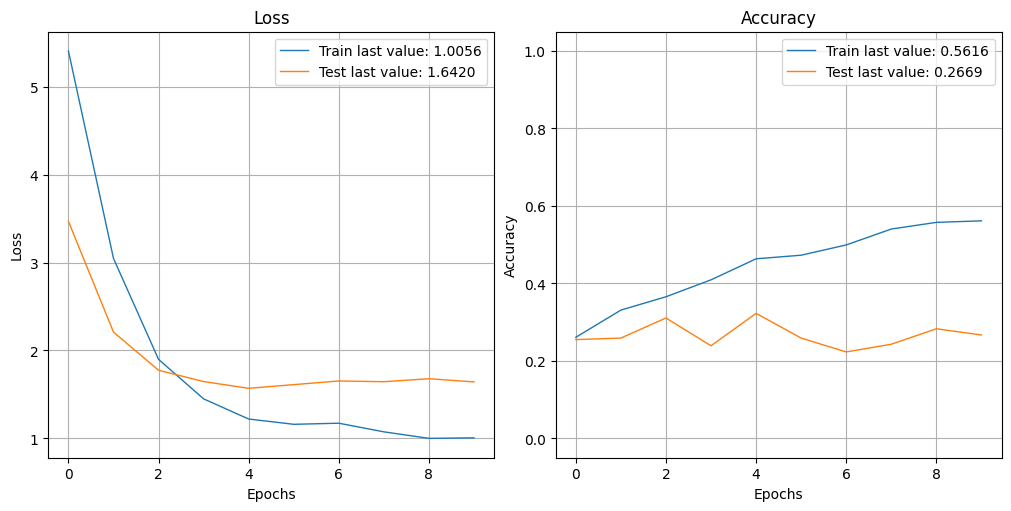

In [95]:
# plot blabla

show_history(history2)
plot_history(history2, path = 'standard.png')
plt.close()

## Approche nouvelle par Dataset sans data augmentation

CF https://www.tensorflow.org/tutorials/load_data/images

In [96]:
batch_size = 32

In [97]:
def dataset_fct(batch_size, path, validation_split = 0, data_type = None):
    dataset = tf.keras.utils.image_dataset_from_directory(
                    path, labels = None, label_mode = 'categorical',
                    class_names = None, batch_size = batch_size, image_size = (224, 224), shuffle = True, seed = 42,
                    validation_split = validation_split, subset = data_type
                    )
    return dataset

In [98]:
# ici nécessite d'avoir images train et test dans 2 dossiers différents
# -> séparer les images dans deux dossiers (train et test)

In [99]:
path = '/Users/lucilerabeau/code/LucileRb/classification_auto_consommation/data/Images/train/'
path_test = '/Users/lucilerabeau/code/LucileRb/classification_auto_consommation/data/Images/test/'

In [100]:
# dataset train et validation
dataset_train = dataset_fct(batch_size, path, validation_split = 0.25, data_type = 'training')
dataset_val = dataset_fct(batch_size, path, validation_split = 0.25, data_type = 'validation')

# dataset test
dataset_test = dataset_fct(batch_size, path_test, validation_split = 0, data_type = None)

Found 0 files belonging to 1 classes.
Using 0 files for training.


ValueError: No images found in directory /Users/lucilerabeau/code/LucileRb/classification_auto_consommation/data/Images/train/. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

In [ ]:
dataset_train = fonctions.dataset_fct(batch_size, path, validation_split = 0.25, data_type = 'training')
dataset_val = fonctions.dataset_fct(batch_size, path, validation_split = 0.25, data_type = 'validation')

In [ ]:
dataset_test = fonctions.dataset_fct(batch_size, path_test, validation_split = 0, data_type = None)

In [ ]:
path = '/Users/lucilerabeau/code/LucileRb/classification_auto_consommation/data/Images/train/'
dataset_train = fonctions.dataset_fct(batch_size, path, validation_split = 0.25, data_type = 'training')

In [ ]:
def dataset_fct(batch_size, path, validation_split = 0, data_type = None):
    dataset = tf.keras.utils.image_dataset_from_directory(
                    path, labels = 'inferred', label_mode = 'categorical',
                    class_names = None, batch_size = batch_size, image_size = (224, 224), shuffle = True, seed = 42,
                    validation_split = validation_split, subset = data_type
                    )
    return dataset

In [ ]:
tf.keras.utils.image_dataset_from_directory(
                    directory = '/Users/lucilerabeau/code/LucileRb/classification_auto_consommation/data/Images/train/', labels = None, label_mode = 'categorical',
                    class_names = None, batch_size = 32, image_size = (224, 224), shuffle = True, seed = 42,
                    validation_split = 0, subset = None
                    )

In [ ]:
# Création du modèle
with tf.device('/gpu:0'):
    model3 = fonctions.create_model_fct()

# Création du callback
model3_save_path = './model3_best_weights.h5'
checkpoint = ModelCheckpoint(model3_save_path, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'min')
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
callbacks_list = [checkpoint, es]

In [ ]:
print('Num GPUs Available: ', len(tf.config.list_physical_devices('GPU')))

In [ ]:
with tf.device('/gpu:0'):
    history3 = model3.fit(
        dataset_train,
        validation_data = dataset_val,
        batch_size = batch_size,
        epochs = 50,
        callbacks = callbacks_list,
        verbose = 1
        )

In [ ]:
# Score du dernier epoch

loss, accuracy = model3.evaluate(dataset_train, verbose = True)
print('Training Accuracy : {:.4f}'.format(accuracy))

loss, accuracy = model3.evaluate(dataset_val, verbose = True)
print('Validation Accuracy : {:.4f}'.format(accuracy))

In [ ]:
# Score de l'epoch optimal
model3.load_weights(model3_save_path)

loss, accuracy = model3.evaluate(dataset_val, verbose = False)
print('Validation Accuracy : {:.4f}'.format(accuracy))

loss, accuracy = model3.evaluate(dataset_test, verbose = False)
print('Test Accuracy : {:.4f}'.format(accuracy))


In [ ]:
# plot blablabla

show_history(history3)
plot_history(history3, path = 'standard.png')
plt.close()

## Approche nouvelle par Dataset avec data augmentation intégrée au modèle

CF https://www.tensorflow.org/tutorials/images/data_augmentation

In [ ]:
batch_size = 32

In [ ]:
dataset_train = fonctions.dataset_fct(batch_size, path, validation_split = 0.25, data_type = 'training')
dataset_val = fonctions.dataset_fct(batch_size, path, validation_split = 0.25, data_type = 'validation')
dataset_test = fonctions.dataset_fct(batch_size, path_test, validation_split = 0, data_type = None)

In [ ]:
# Création du modèle
with tf.device('/gpu:0'):
    model4 = fonctions.create_model_fct2()

# Création du callback
model4_save_path = './model4_best_weights.h5'
checkpoint = ModelCheckpoint(model4_save_path, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'min')
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
callbacks_list = [checkpoint, es]

In [ ]:
print('Num GPUs Available: ', len(tf.config.list_physical_devices('GPU')))

In [ ]:
with tf.device('/gpu:0'):
    history4 = model4.fit(dataset_train,
                    validation_data = dataset_val,
                    batch_size = batch_size, epochs = 50, callbacks = callbacks_list, verbose = 1)

In [ ]:
# Score du dernier epoch

loss, accuracy = model4.evaluate(dataset_train, verbose = True)
print('Training Accuracy : {:.4f}'.format(accuracy))

loss, accuracy = model4.evaluate(dataset_val, verbose = True)
print('Validation Accuracy : {:.4f}'.format(accuracy))

In [ ]:
# Score de l'epoch optimal
model4.load_weights(model4_save_path)

loss, accuracy = model4.evaluate(dataset_val, verbose = False)
print('Validation Accuracy : {:.4f}'.format(accuracy))

loss, accuracy = model4.evaluate(dataset_test, verbose = False)
print('Test Accuracy : {:.4f}'.format(accuracy))


In [ ]:
# plot blablabla

show_history(history4)
plot_history(history4, path = 'standard.png')
plt.close()